In [251]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [252]:
df = pd.read_csv('electricity_generation.csv')
df.head()

,Entity,Code,Year,Electricity generation - TWh
0,ASEAN (Ember),NaN,2000,378.61
1,ASEAN (Ember),NaN,2001,404.85
2,ASEAN (Ember),NaN,2002,433.19
3,ASEAN (Ember),NaN,2003,458.24
4,ASEAN (Ember),NaN,2004,496.56


## cleaning process of the data

In [253]:
# droping of the 'Code' column if it exists (case-sensitive); ignore if missing to avoid KeyError
df.drop(columns=['Code'], errors='ignore', inplace=True)
df.head()

,Entity,Year,Electricity generation - TWh
0,ASEAN (Ember),2000,378.61
1,ASEAN (Ember),2001,404.85
2,ASEAN (Ember),2002,433.19
3,ASEAN (Ember),2003,458.24
4,ASEAN (Ember),2004,496.56


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7981 entries, 0 to 7980
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Entity                        7981 non-null   object 
 1   Year                          7981 non-null   int64  
 2   Electricity generation - TWh  7981 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 187.2+ KB


In [255]:
# change of the 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7981 entries, 0 to 7980
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Entity                        7981 non-null   object        
 1   Year                          7981 non-null   datetime64[ns]
 2   Electricity generation - TWh  7981 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 187.2+ KB


In [256]:
df.isnull().sum()

Entity                          0
Year                            0
Electricity generation - TWh    0
dtype: int64

In [257]:
# showing of  the entities  that are in the datasets in order to clean the continents as the analysis will mainly focus the countries
df['Entity'].unique()

array(['ASEAN (Ember)', 'Afghanistan', 'Africa', 'Africa (EI)',
       'Africa (Ember)', 'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Asia (Ember)', 'Asia Pacific (EI)', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'CIS (EI)', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Central African Republic',
       'Central America (EI)', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'EU (Ember)', 'East Tim

In [258]:
# displaying of the continents present in the datasets and any value different from countries will be removed
continents = ['Africa', 'Africa (EI)','Europe','Africa (Ember)', 'Asia', 'Americas', 'World','Asia (Ember)','Oceania','World ','Asia Pacific (EI)','Europe (EI)','Europe (Ember)','North America','South America','Central America','Caribbean','EU (Ember)','Eastern Africa (EI)','Western Africa (EI)','Middle Africa (EI)','Northern Africa (EI)','Southern Africa (EI)','Southern Asia (EI)','Eastern Asia (EI)','South-Eastern Asia (EI)','Western Asia (EI)','Central Asia (EI)','Northern Europe (EI)','Southern Europe (EI)','Eastern Europe (EI)','Western Europe (EI)','Northern America (EI)','Latin America ,the Caribbean (EI)','Upper-middle-income countries']
df_continents = df[df['Entity'].isin(continents)]
df_continents['Entity'].value_counts()

Entity
Europe (EI)                      40
Eastern Africa (EI)              40
Western Africa (EI)              40
Middle Africa (EI)               40
Africa (EI)                      40
World                            40
Asia Pacific (EI)                40
Europe                           39
Asia                             39
North America                    39
Oceania                          39
South America                    39
Upper-middle-income countries    39
Africa                           39
EU (Ember)                       35
Asia (Ember)                     25
Europe (Ember)                   25
Africa (Ember)                   25
Name: count, dtype: int64

In [259]:
# suppression des continents pour ne garder que les pays
df_countries = df[~df['Entity'].isin(continents)]
df_continents = df_countries[df_countries['Entity'].isin(continents)]
df_continents.value_counts('Entity')


Series([], Name: count, dtype: int64)

In [260]:
print(df.shape, df_countries.shape)

(7981, 3) (7318, 3)


In [261]:
# enregistrement du nouveau dataframe dans un fichier excel 
df_countries.to_excel('electricity_generation_countries.xlsx', index=False)

In [262]:
df2= df_countries.copy()
df2.rename(columns={'Electricity generation - TWh':'elec_prod' }, inplace=True)
df2.head()

,Entity,Year,elec_prod
0,ASEAN (Ember),2000-01-01,378.61
1,ASEAN (Ember),2001-01-01,404.85
2,ASEAN (Ember),2002-01-01,433.19
3,ASEAN (Ember),2003-01-01,458.24
4,ASEAN (Ember),2004-01-01,496.56


In [263]:
df2.describe()

,Year,elec_prod
count,7318,7318.000000
mean,2007-10-15 11:06:28.630773504,484.865903
min,1985-01-01 00:00:00,0.000000
25%,2001-01-01 00:00:00,1.990000
50%,2009-01-01 00:00:00,18.675000
75%,2016-01-01 00:00:00,85.947500
max,2024-01-01 00:00:00,25937.430000
std,NaN,1977.192195


## ANALYSE UNIVARIEE

L'analyse univariée va principalement se porter sur la production energetique 

In [264]:
df2['elec_prod'].describe()

count     7318.000000
mean       484.865903
std       1977.192195
min          0.000000
25%          1.990000
50%         18.675000
75%         85.947500
max      25937.430000
Name: elec_prod, dtype: float64

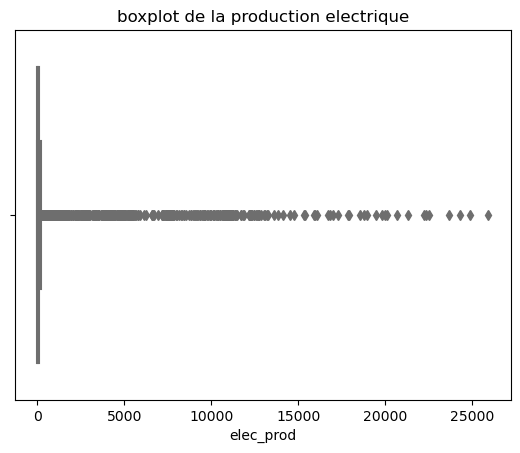

In [265]:
sns.boxplot(x= df2['elec_prod'], color='lightcoral')
plt.title('boxplot de la production electrique')
plt.show()


In [266]:
# écart interquartile, skewness, kurtosis
q1 = df2['elec_prod'].quantile(0.25)
q3 = df2['elec_prod'].quantile(0.75)
iqr = q3 - q1
skew = df2['elec_prod'].skew()
kurt = df2['elec_prod'].kurtosis()
iqr, skew, kurt

(83.9575, 6.373181980572108, 48.27104591642901)

## Interprétation qu'on peut tirer de cette analyse

iqr plus élevée ~89 representant la difference entre le 1er quartile et le 3eme quartile  montre une forte dispersion des valeurs autour de la médiane  
ce qui montre ici des ecarts considerables et disproportionnés  entre la production electrique des pays à travers le monde
  
    Hypotheses:  
   . Mix energetique de certains pays qui ont une forte production electrique  
   . faible exploitation des ressources energetiques de certains pays  
   .Absence des ressources energetiques de certains pays   
   

skew ~ 6.2 tres elevé pour confirmer que la distrubution est asymétrique avec une forte concentration à gauche . ce qui montre que la moyenne est plus grande que la mediane confirmant ainsi les valeurs obtenues dans les infos statistiques obtenues dnas la cellule precedente. il y en aurait une possibilite d'existence de plusieurs outliers . la distribution n'est pas normale.

   Hypotheses:  
    . forte concentration à gauche de la mediane prouve qu'il y a de nombreux pays qui produisent une quantité insuffisante d'electricité.  
    .En clair, les données contiennent des pays ou années où la production électrique est extraordinairement élevée, ce qui crée une très longue queue à droite.

## Interpretation globale
 En clair ces donnees energetiques montrent que seulement quelques pays produisent plus d'electricité   
 La plupart des pays en produient peu  
 Quelques années où les valeurs moyennes s'explosent  

 En conclusion la distribution n'est pas normale et il nécéssite des methodes d'analyse plus robustes


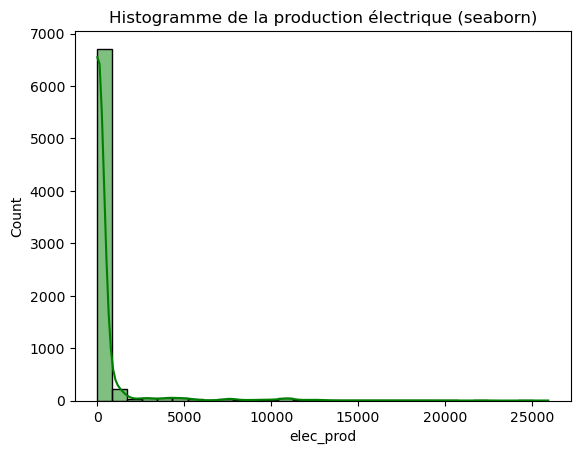

In [267]:

# diminution de bins de frequence pour mieux voir la distribution
sns.histplot(df2['elec_prod'], kde = True, color='green', edgecolor='black', bins=30)
plt.title('Histogramme de la production électrique (seaborn)')

plt.show()

## Analyse et interprétation


### Vérification de certaines informations pertinentes

In [268]:
# countries that have electricity production equal to zero
zero_prod_countries = df2[df2['elec_prod'] == 0]['Entity'].unique()
zero_prod_countries

array(['Niue'], dtype=object)

verification de la raison pour laquelle ce pays a une production electrique nulle durant toute la periode 1985-2024.  
Suite à une recherche menée sur Internet NIUE est l'un des petits pays du monde avec une superficie de 261 km2 . c'est pays insulaire qui se situe dans l'ocean pacifique sud. les donnée obteues ici sur la production electrique de NIUE sont elles fiables ? toutes ces données sont elles représentées ou c'est pour quelques années seulement qui sont recueillies.   pour répondre à cette question la source: https://www.worldometers.info/fr/electricite/niue-electricite/ qui represante la consommation energetique de NIUE en 2016 nous en dira plus . bien avant de la consulter verififons les années sur lesqquelles NIUE a assuré sa production .

In [269]:
df2[df2['Entity']=='Niue']

,Entity,Year,elec_prod
4942,Niue,2000-01-01,0.0
4943,Niue,2001-01-01,0.0
4944,Niue,2002-01-01,0.0
4945,Niue,2003-01-01,0.0
4946,Niue,2004-01-01,0.0
4947,Niue,2005-01-01,0.0
4948,Niue,2006-01-01,0.0
4949,Niue,2007-01-01,0.0
4950,Niue,2008-01-01,0.0
4951,Niue,2009-01-01,0.0


le resultat montre ici clairement que NIUE sur toute la periode s'étalant sur l'intervalle 2001-2022 qu'il n'a eu aucune production electrique , deja avec la valeur nulle obtenue , nous pouvons tous rapidement savoir que ses données sont mal recueillies puisqu'aucun pays à l'heure actuelle ne peut vivre sans l'électricité. mais ce qui m'a poussé encore loin dans la recherche ,peut etre qu'il serait une entité contemporaine qui continue par vivre une histoire ancienne . pour trancher rapidement ça je me suis référé à cette source qui apporte encore de la  lumiere sur sa prodution énergetique en 2016. un petit scraping pour voir ses sources de production energetique

In [270]:
url=  'https://www.worldometers.info/fr/electricite/niue-electricite/'

In [271]:
# Import et utilisation de la fonction scrape_table_from_url
from scraper_utils import scrape_table_from_url, close_browser

# Scraper le tableau depuis l'URL
df_NIUE = scrape_table_from_url(url, headless=True, timeout_secs=30, chrome_options=opts)

# Afficher un aperçu
if not df.empty:
    display(df_NIUE.head())
else:
    print("Aucune donnée n'a été extraite.")

# Fermer le navigateur pour libérer les ressources
close_browser()

Extracted DataFrame shape: (14, 3)


,Consommation électrique,2 790MWh,
0,Consommation électrique,2 790MWh,
1,Production électrique,3 000MWh,
2,Nucléaire,0MWh,0%
3,Énergies renouvelables,0MWh,0%
4,Hydroélectrique,0MWh,0%


Browser closed successfully.


*** Les données présentées dans le tableau concernent l'année 2016, la dernière année pour laquelle les données sont complètes dans toutes les catégories***  
selon la source.

ce qui peut dejà nous montrer que les valeurs obtenues ici pour NIUE ne sont pas authentique et ne serviront à rien dans la suite de notre analyse

In [272]:
# suppression de NUIE dans le dataframe principal
df2_new = df2[df2['Entity'] != 'Niue']
df2_new[df2_new['Entity']=='Niue']  # verification de la suppression

,Entity,Year,elec_prod


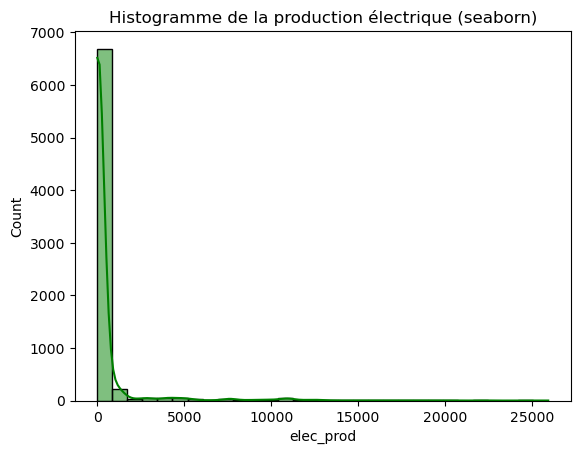

In [273]:

# diminution de bins de frequence pour mieux voir la distribution
sns.histplot(df2_new['elec_prod'], kde = True, color='green', edgecolor='black', bins=30)
plt.title('Histogramme de la production électrique (seaborn)')

plt.show()

In [ ]:
# regroupement des données energetiques par pays
df_grouped = df2_new.groupby(['Entity'])['elec_prod'].sum().reset_index()
df_grouped.head()

# copy of the countries without NUIE
df3= df_grouped.copy()
#df3.to_excel('electricity_production_countries.xlsx', index=False)

In [236]:

df3['elec_prod'].mode()

0    0.23
1    4.12
2    4.74
Name: elec_prod, dtype: float64

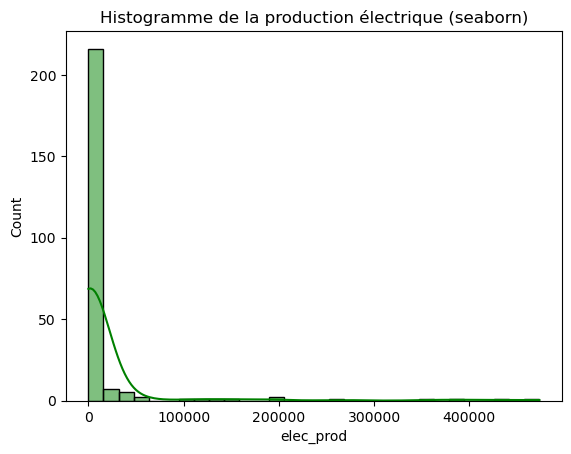

In [237]:
sns.histplot(df3['elec_prod'], kde = True, color='green', edgecolor='black', bins=30)
plt.title('Histogramme de la production électrique (seaborn)')

plt.show()

In [238]:
# Create a new categorical variable from elec production
def categorize_production(value):
    if value == 0:
        return 'No Production'
    elif value < 1000:
        return 'Low Production'
    elif value < 10000:
        return 'Medium Production'
    else:
        return 'High Production'
df3['production_category'] = df3['elec_prod'].apply(categorize_production)
df3['production_category'].value_counts()

production_category
Low Production       152
Medium Production     61
High Production       28
Name: count, dtype: int64

In [239]:
# repartir les pays dans le dataframe selon leur categorie de production
df_no_prod = df3[df3['production_category'] == 'No Production']
df_low_prod = df3[df3['production_category'] == 'Low Production']
df_med_prod = df3[df3['production_category'] == 'Medium Production']
df_high_prod = df3[df3['production_category'] == 'High Production']
# creer un nouveau data frame avec les colonnes low production, medium production et high production
df_final = pd.concat([df_low_prod, df_med_prod, df_high_prod], ignore_index=True)
df_final.head()

,Entity,elec_prod,production_category
0,Afghanistan,23.23,Low Production
1,Albania,135.47,Low Production
2,American Samoa,4.12,Low Production
3,Angola,192.87,Low Production
4,Antigua and Barbuda,7.20,Low Production


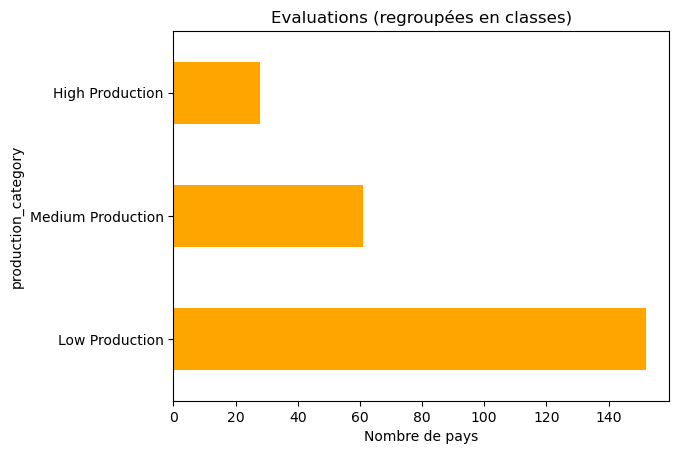

In [240]:
elec_classes =df3['production_category'].value_counts()
elec_classes.plot(kind='barh', color='orange')
plt.title('Evaluations (regroupées en classes)')
plt.xlabel('Nombre de pays')
plt.show()

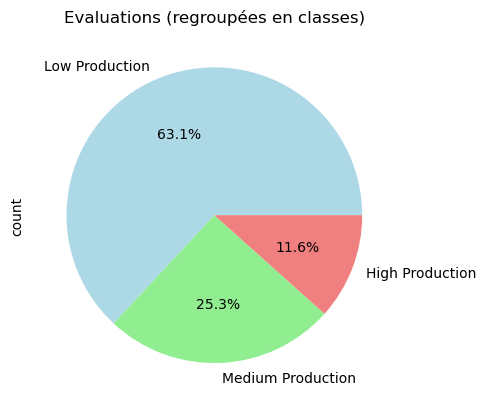

In [245]:
elec_classes.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Evaluations (regroupées en classes)')
plt.show()

In [246]:

# afficher les pays qui ont une high production

df_high_prod[['High_prod_countries', 'elec_prod']] = df_high_prod[['Entity', 'elec_prod']]
df_high_prod[['High_prod_countries', 'elec_prod']]


C:\Users\fredb\AppData\Local\Temp\ipykernel_14788\2868457371.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_prod[['High_prod_countries', 'elec_prod']] = df_high_prod[['Entity', 'elec_prod']]


,High_prod_countries,elec_prod
0,ASEAN (Ember),20111.110000
26,Brazil,16913.119190
32,CIS (EI),50679.450100
35,Canada,23679.475220
42,China,139418.627000
67,European Union (27),103068.548500
72,France,20509.994510
75,G20 (Ember),473611.030000
76,G7 (Ember),189503.880000
80,Germany,23044.748000


In [247]:
# Middle production countries
df_med_prod[['Med_prod_countries', 'elec_prod']] = df_med_prod[['Entity', 'elec_prod']]
df_med_prod[['Med_prod_countries', 'elec_prod']]


C:\Users\fredb\AppData\Local\Temp\ipykernel_14788\1434156406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_med_prod[['Med_prod_countries', 'elec_prod']] = df_med_prod[['Entity', 'elec_prod']]


,Med_prod_countries,elec_prod
3,Algeria,1700.404890
7,Argentina,4066.576436
10,Australia,8685.396000
11,Austria,2391.541000
15,Bangladesh,1503.527000
...,...,...
227,Ukraine,7783.770000
228,United Arab Emirates,2891.777860
233,Uzbekistan,2181.244900
235,Venezuela,3568.881070


In [248]:
#lower production countries
df_low_prod[['Low_prod_countries', 'elec_prod']] = df_low_prod[['Entity', 'elec_prod']]
df_low_prod[['Low_prod_countries', 'elec_prod']]



C:\Users\fredb\AppData\Local\Temp\ipykernel_14788\2328272914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_prod[['Low_prod_countries', 'elec_prod']] = df_low_prod[['Entity', 'elec_prod']]


,Low_prod_countries,elec_prod
1,Afghanistan,23.23
2,Albania,135.47
4,American Samoa,4.12
5,Angola,192.87
6,Antigua and Barbuda,7.20
...,...,...
234,Vanuatu,1.53
237,Western Sahara,0.88
238,Yemen,119.32
239,Zambia,293.24
